In [1]:
import pandas as pd
import geopandas as gpd

import pycountry

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
csv_location = "./EVS_WVS_Joint_csv_v4_0.csv"

In [3]:
df = pd.read_csv(csv_location)
def to_iso3(iso2):
    country = pycountry.countries.get(alpha_2=iso2)
    if iso2 == 'NIR':
        return 'NIR'
    if country is None:
        print(iso2)
        return None
    return country.alpha_3
    
df['country_iso3'] = df['cntry_an'].map(to_iso3)
df

/var/folders/nf/t0pnsdfs4c1dksq9jzrbh12m0000gn/T/ipykernel_75757/4128752805.py:1: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_location)


,study,wave,version,versn_s,doi_gesis,doi_wvsa,studytit,uniqid,intrvwr_id,cntry,...,w003,x052,x035_evs5,x036e_wvs7,v097ef,w005_evs5,w006e_wvs7,x047_wvs7,x047e_evs5,country_iso3
0,1,5,4-0-0 (2022-12-14),5-0-0 (2022-05-16),doi:10.4232/1.14023,doi:10.14281/18241.21,EVS5,8050001,7,8,...,4,1,52,-4,9,13,-4,-4,3,ALB
1,1,5,4-0-0 (2022-12-14),5-0-0 (2022-05-16),doi:10.4232/1.14023,doi:10.14281/18241.21,EVS5,8050002,1,8,...,3,-3,63,-4,9,63,-4,-4,1,ALB
2,1,5,4-0-0 (2022-12-14),5-0-0 (2022-05-16),doi:10.4232/1.14023,doi:10.14281/18241.21,EVS5,8050003,10,8,...,4,-3,63,-4,9,63,-4,-4,4,ALB
3,1,5,4-0-0 (2022-12-14),5-0-0 (2022-05-16),doi:10.4232/1.14023,doi:10.14281/18241.21,EVS5,8050004,6,8,...,7,-3,63,-4,9,63,-4,-4,1,ALB
4,1,5,4-0-0 (2022-12-14),5-0-0 (2022-05-16),doi:10.4232/1.14023,doi:10.14281/18241.21,EVS5,8050005,1,8,...,7,-3,-3,-4,8,93,-4,-4,-1,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153711,2,7,4-0-0 (2022-12-14),5-0-0 (2022-12-14),doi:10.4232/1.14023,doi:10.14281/18241.21,WVS7,716721211,50,716,...,7,-3,-4,0,0,-4,0,5,-4,ZWE
153712,2,7,4-0-0 (2022-12-14),5-0-0 (2022-12-14),doi:10.4232/1.14023,doi:10.14281/18241.21,WVS7,716721212,50,716,...,1,3,-4,1,1,-4,1,5,-4,ZWE
153713,2,7,4-0-0 (2022-12-14),5-0-0 (2022-12-14),doi:10.4232/1.14023,doi:10.14281/18241.21,WVS7,716721213,60,716,...,3,2,-4,0,0,-4,5,5,-4,ZWE
153714,2,7,4-0-0 (2022-12-14),5-0-0 (2022-12-14),doi:10.4232/1.14023,doi:10.14281/18241.21,WVS7,716721214,60,716,...,3,2,-4,9,6,-4,9,1,-4,ZWE


In [4]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

In [5]:
class Question(object):
    def __init__(self, question_key, question, raw_choices, choice_labels, default_threshold):
        self._question_key  = question_key
        self._question      = question
        self._raw_choices   = raw_choices
        self._choice_labels = choice_labels
        self._threshold     = default_threshold
        
    def set_threshold(self, threshold):
        self._threshold = threshold
        
def weak_to_strongly_agree__no_middle(question_key, question):
    raw_choices = [ 1, 2, 3, 4 ]
    choice_labels = [ "Strongly Agree", "Agree", "Disagree", "Strongly Disagree" ]
    default_threshold = 2
    return Question(question_key, question, raw_choices, choice_labels, default_threshold)

In [6]:
ParentsProud = \
    weak_to_strongly_agree__no_middle("d054", "One of my main goals in life has been to make my parents proud")

In [7]:
def plot_summary(df, Q, world):
    refined = df[['country_iso3', Q._question_key]]
    refined = refined[refined[Q._question_key] > 0]
    refined['indicator'] = refined[Q._question_key] <= Q._threshold
    summarized = (refined.groupby("country_iso3")['indicator'].mean() * 100).to_frame()
    final_df = world.join(summarized, on="iso_a3")
    fig, ax = plt.subplots(1, 1)
    fig.set_dpi(1200)
    ax.set_title(Q._question)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    final_df.plot(column="indicator", ax=ax, legend=True, cax=cax, missing_kwds={'color': 'lightgrey'})

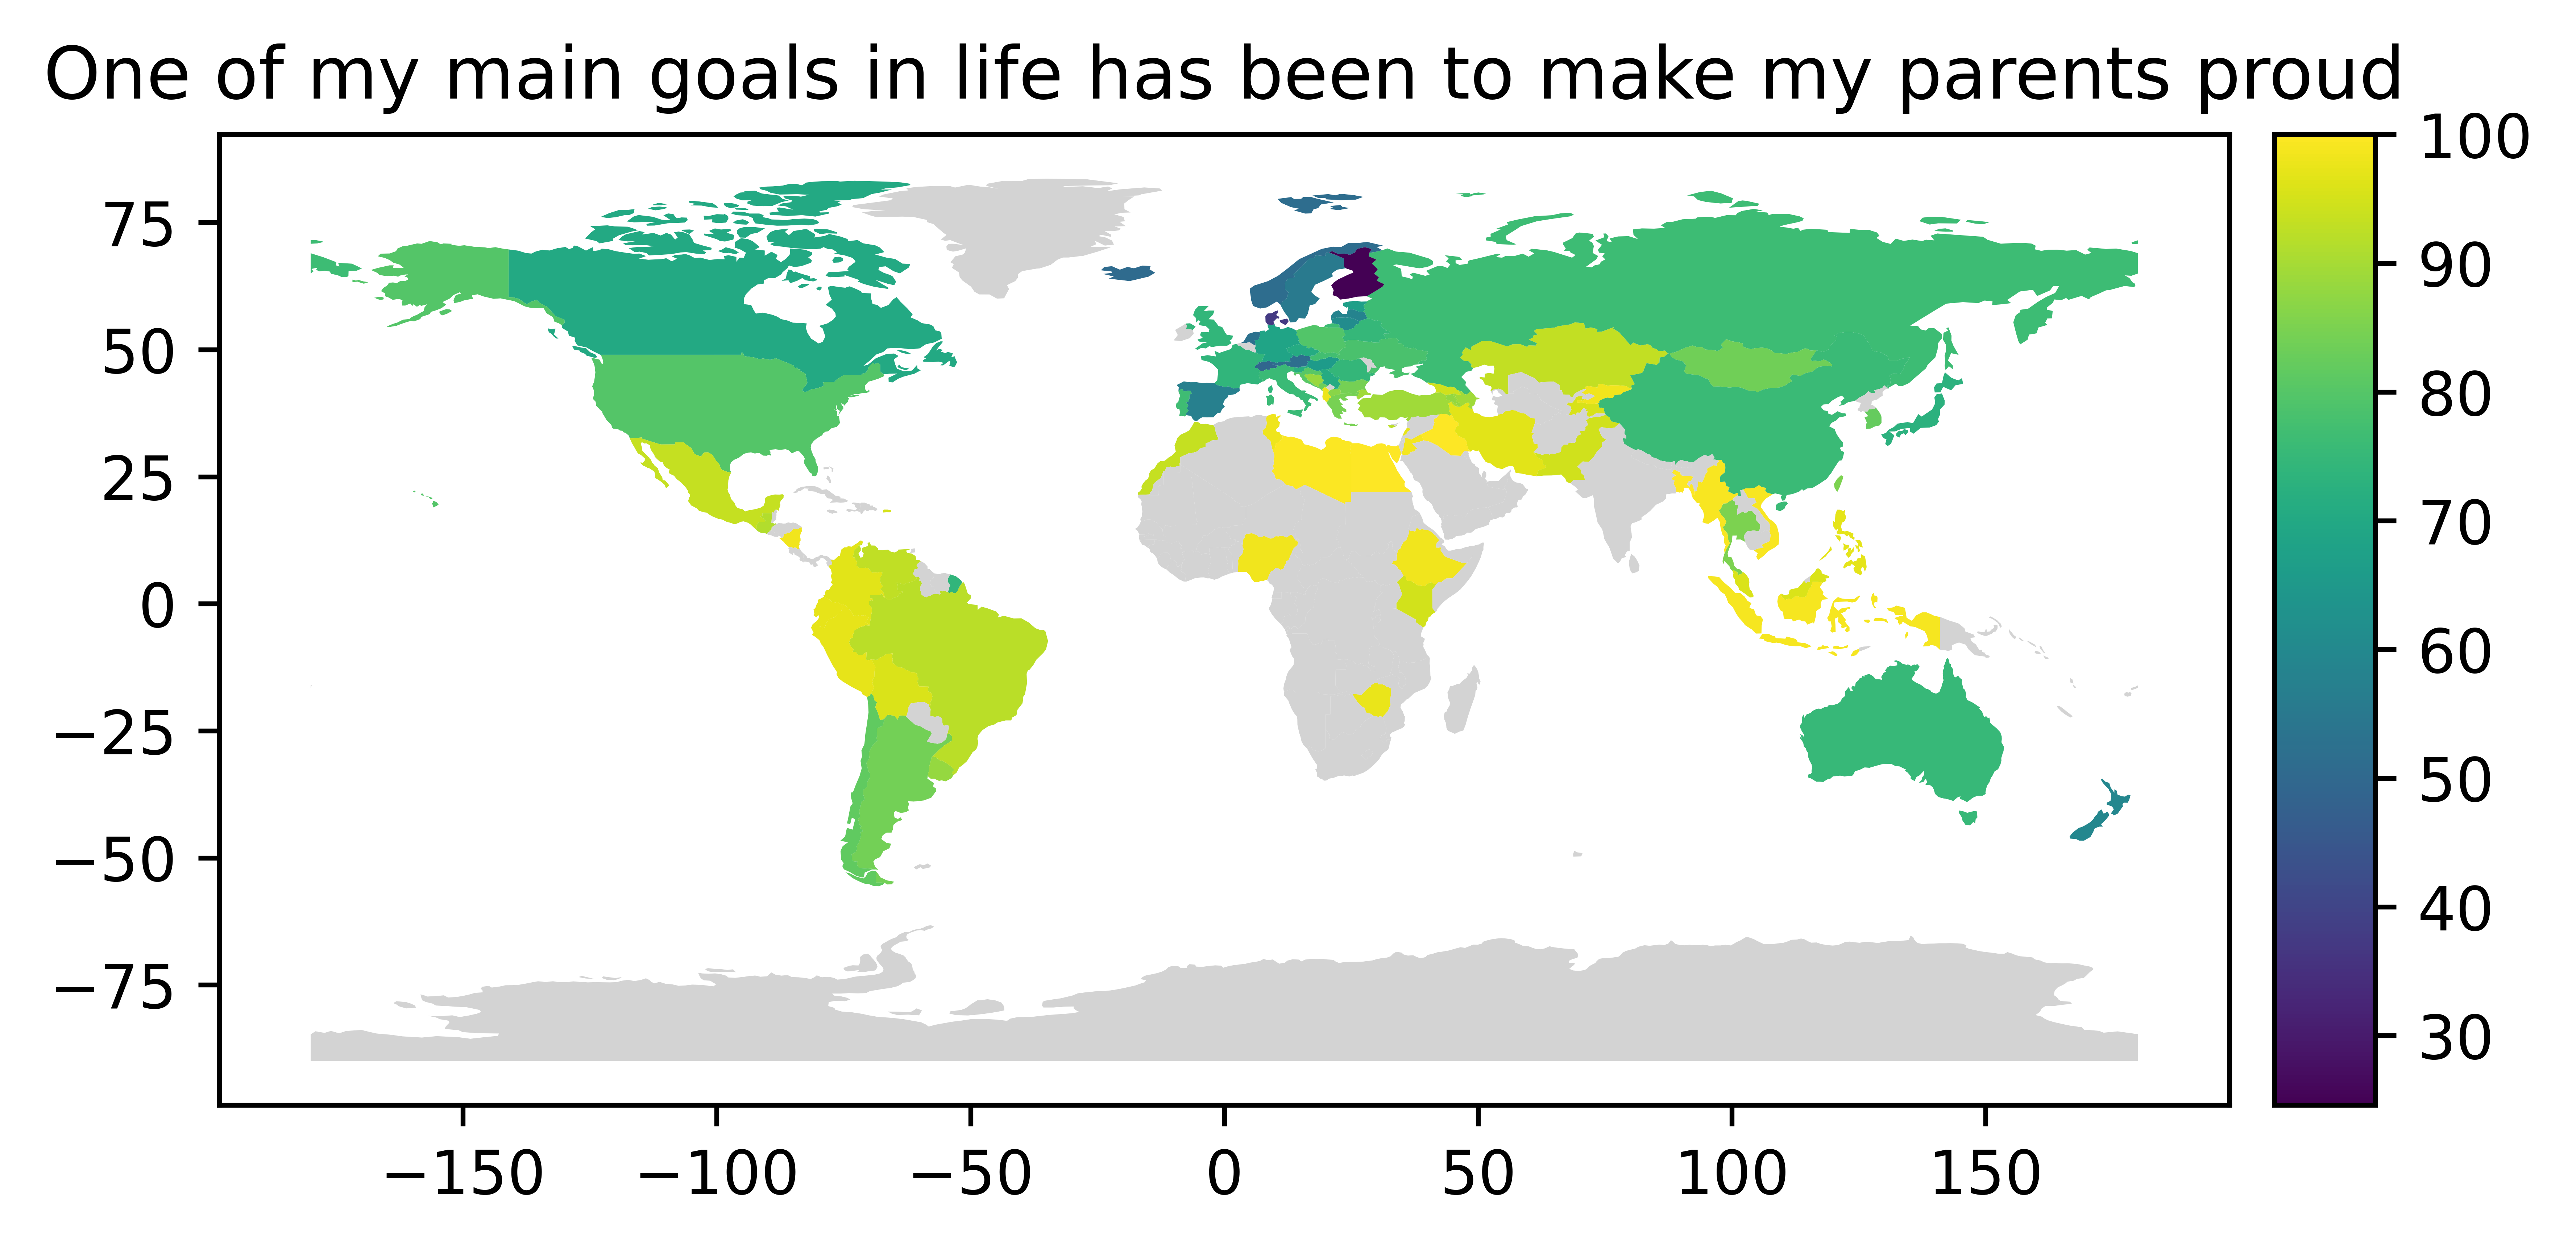

In [8]:
plot_summary(df, ParentsProud, world)